# PART1 簡単な予測モデルを作ってみよう

## おまじない

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression as LR

## データの読み込み
- train.csvとtest.csvとsample.csvの３つのファイルを読み込みましょう
- それぞれを読み込んだものは変数はtrain, test, sampleに代入しましょう
- sampleを読み込む時は、header=Noneというオプションを忘れないようにしましょう

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample.csv', header=None)

## trainの先頭行を見てみましょう

In [3]:
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


## trainから説明変数と目的変数となるデータを取り出しましょう
- 説明変数はtrainからtemperatureを選択し、変数名をtrainXとして代入しましょう
- 目的変数はtrainからyを選択し、変数名をyとして代入しましょう

In [7]:
trainX = train['temperature']
y = train['y']

## testから説明変数となるデータを取り出しましょう
- 説明変数はtrainと同じtemperatureを選択し、変数名をtestXとして代入しましょう

In [8]:
testX = test['temperature']

## 単回帰の場合のみ、説明変数に対しておまじないが必要となります
- 単回帰の場合はややこしいですが、train,testの説明変数ともに、データの形を整える必要があります
- 具体的にはvalues.reshape(-1,1)というおまじないをします
- 整えた後、再び変数Xに代入します

In [9]:
trainX

0      19.8
1      17.0
2      15.5
3      15.2
4      16.1
       ... 
202    24.8
203    25.4
204    27.1
205    26.6
206    28.1
Name: temperature, Length: 207, dtype: float64

In [10]:
trainX = trainX.values.reshape(-1, 1)
testX = testX.values.reshape(-1, 1)

In [11]:
trainX

array([[19.8],
       [17. ],
       [15.5],
       [15.2],
       [16.1],
       [14.6],
       [17.9],
       [14.7],
       [17.7],
       [12.1],
       [13.8],
       [13.9],
       [13.5],
       [13.8],
       [14.9],
       [ 9.1],
       [ 7.1],
       [11. ],
       [12.3],
       [13.9],
       [11.3],
       [10.8],
       [ 7.8],
       [ 6.8],
       [ 8.4],
       [11.5],
       [ 8. ],
       [ 7.3],
       [ 7.3],
       [ 9.8],
       [10.9],
       [ 5.1],
       [ 5.8],
       [ 2.9],
       [ 7. ],
       [ 7.8],
       [ 6.5],
       [10.4],
       [ 7.4],
       [ 8.5],
       [10.1],
       [ 5.1],
       [12.6],
       [10.3],
       [15.3],
       [14.1],
       [15.9],
       [ 3.8],
       [ 3. ],
       [ 4.2],
       [ 5.5],
       [ 7.8],
       [ 6.3],
       [ 6.4],
       [ 1.2],
       [11.6],
       [ 6.8],
       [ 7.3],
       [ 5.4],
       [ 8.5],
       [ 6.6],
       [10.5],
       [11.5],
       [ 8.5],
       [17.7],
       [ 7.8],
       [ 8

## 回帰のモデルの箱を用意しましょう
- モデルを作る為にはまず、モデルを表す箱が必ず必要になります
- 変数名をmodel1として、LR()を代入しましょう

In [12]:
model1 = LR()

## 単回帰モデルを作りましょう
- fit関数を使います
- カッコの中に、説明変数、目的変数の順番に書きます

In [13]:
model1.fit(trainX, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 作ったモデルの傾きや切片を確かめてみましょう
- 傾きはcoef_を使います
- 切片はintercept_を使います

In [14]:
model1.coef_

array([-2.5023821])

In [15]:
model1.intercept_

134.79948383749922

## 予測をしましょう
- predict関数を使います
- 予測結果は変数predに代入しましょう

In [16]:
pred = model1.predict(testX)

In [18]:
testX

array([[20.2],
       [23.9],
       [28.7],
       [21.5],
       [22.1],
       [23.3],
       [22.5],
       [26.1],
       [26.8],
       [15.6],
       [18.6],
       [23. ],
       [23.9],
       [20.2],
       [15.5],
       [14.7],
       [18.7],
       [22.7],
       [19.1],
       [19.6],
       [19.6],
       [18.8],
       [18.9],
       [16. ],
       [19.2],
       [20.1],
       [21.2],
       [14.7],
       [14.4],
       [19.5],
       [15.8],
       [14.3],
       [16.1],
       [14.9],
       [10.5],
       [14.9],
       [11.4],
       [ 9.2],
       [15.1],
       [15.3]])

In [17]:
pred

array([ 84.25136537,  74.99255159,  62.9811175 ,  80.99826864,
        79.49683938,  76.49398085,  78.49588653,  69.48731097,
        67.73564349,  95.76232304,  88.25517673,  77.24469548,
        74.99255159,  84.25136537,  96.01256125,  98.01446693,
        88.00493852,  77.99541011,  87.00398568,  85.75279463,
        85.75279463,  87.75470031,  87.5044621 ,  94.7613702 ,
        86.75374747,  84.50160358,  81.74898327,  98.01446693,
        98.76518156,  86.00303284,  95.26184662,  99.01541977,
        94.51113199,  97.51399051, 108.52447176,  97.51399051,
       106.27232787, 111.7775685 ,  97.01351409,  96.51303767])

## sampleの中身を確認してみましょう

## sample[1]に予測結果を代入しましょう

## sampleをファイルで書きだしましょう
- to_csv関数を使います
- オプションは３つあり、"submit1.csv", index=None, header=Noneを書きます

# 実習
1.説明変数をkcalとして、単回帰モデルを作ろう。まず、 trainとtestのkcalに欠損値があるかないか確認しよう
- 本当に欠損があるかどうか、head関数を使って確認しよう

In [20]:
train['kcal'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: kcal, dtype: float64

2.trainのkcalの平均値を求め、変数avgに代入しよう

In [25]:
avg = train['kcal'].mean()
avg

404.4096385542169

3.変数avgを使って、trainとtestのkcalの欠損値を補間し、それぞれを変数名trainXとtestXに代入してみよう

In [29]:
trainX = train['kcal'].fillna(avg)
testX = test['kcal'].fillna(avg)
trainX

0      404.409639
1      404.409639
2      404.409639
3      404.409639
4      404.409639
          ...    
202    408.000000
203    394.000000
204    404.409639
205    404.000000
206    398.000000
Name: kcal, Length: 207, dtype: float64

4.trainXとtestXをvalues.reshape(-1,1)を使って形を整え、再びtrainX, testXへ代入しよう
    1. 3番ではtrainXにはavgで補間されたtrain["kcal"]が代入される
    2. 4番では補間されたtrainXにおまじないをかけたものがtrainXに代入されることになる

In [30]:
trainX = trainX.values.reshape(-1, 1)
testX = testX.values.reshape(-1, 1)

In [31]:
trainX

array([[404.40963855],
       [404.40963855],
       [404.40963855],
       [404.40963855],
       [404.40963855],
       [404.40963855],
       [404.40963855],
       [404.40963855],
       [404.40963855],
       [404.40963855],
       [404.40963855],
       [404.40963855],
       [404.40963855],
       [404.40963855],
       [404.40963855],
       [404.40963855],
       [404.40963855],
       [404.40963855],
       [404.40963855],
       [404.40963855],
       [404.40963855],
       [404.40963855],
       [404.40963855],
       [404.40963855],
       [404.40963855],
       [404.40963855],
       [404.40963855],
       [404.40963855],
       [404.        ],
       [462.        ],
       [435.        ],
       [440.        ],
       [376.        ],
       [450.        ],
       [415.        ],
       [430.        ],
       [375.        ],
       [447.        ],
       [426.        ],
       [400.        ],
       [418.        ],
       [415.        ],
       [445.        ],
       [450

5.trainからyを取り出し、変数yに代入しよう

In [32]:
y = train['y']

6.回帰モデルの箱を変数名model2として用意しよう

In [33]:
model2 = LR()

7.trainXとyを使って単回帰のモデルを作ろう

In [34]:
model2.fit(trainX, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

8.作ったモデルの傾きと切片を確認しよう

In [35]:
model2.coef_

array([0.13195178])

In [36]:
model2.intercept_

33.26061577029441

9.testXを使って予測をし、予測値を変数pred2に代入しよう

In [37]:
model2.predict(testX)

array([88.68036439, 88.02060548, 86.70108765, 86.04132874, 89.99988221,
       88.68036439, 90.65964112, 86.62318841, 87.096943  , 92.63891786,
       86.04132874, 88.02060548, 89.47207508, 87.36084656, 88.02060548,
       89.73597865, 86.62318841, 86.96499122, 89.3401233 , 89.99988221,
       89.47207508, 90.79159291, 91.31940004, 89.3401233 , 87.36084656,
       86.62318841, 87.62475013, 89.47207508, 88.41646082, 85.51352161,
       89.60402686, 90.39573756, 87.22889478, 89.99988221, 88.81231617,
       86.62318841, 93.95843568, 88.02060548, 88.68036439, 88.15255726])

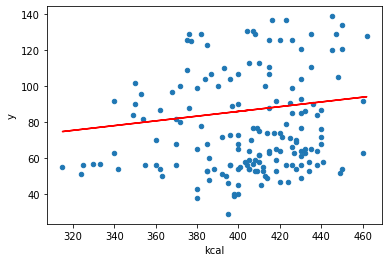

In [41]:
train.plot.scatter(x='kcal', y='y')
plt.plot(trainX, model2.predict(trainX), color='red')

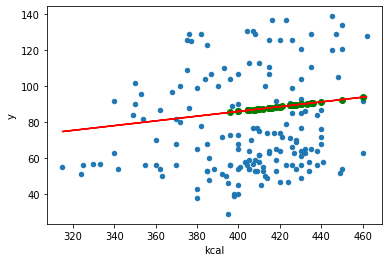

In [49]:
train.plot.scatter(x='kcal', y='y')
#plt.plot(testX, model2.predict(testX), color='red')
plt.plot(trainX, model2.predict(trainX), color='red')
plt.scatter(x=testX, y=model2.predict(testX), color='green')

10.sample[1]にpred2を代入しよう

11.to_csv関数のindex=Noneがある時とない時の違い、header=Noneがある時とない時の違いは何かを考えてみよう

12.sampleをファイル出力し、submit2.csvという投稿用ファイルを作ろう

13.submit2.csvをDeepAnalyticsに投稿して、submit1.csvのスコアを比較してみよう

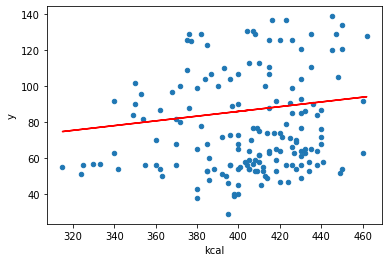

In [38]:
train.plot.scatter(x='kcal', y='y')
plt.plot(trainX, model2.predict(trainX), color='red')